<a href="https://colab.research.google.com/github/Kanchan20-Mandal/ML_module/blob/main/K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## K-Means CLustering - Unsupervised Machine Learning algorithm
  Clusters are formed on basis of Elucidean distance calculated between each datapoint and centroid

## Evaluation metrics are :
Cluster formation:

Inertia:
intra cluster distance: within the cluster, the distance between datapoints should be minimal

inter cluster distance: in between the multiple clusters, the distance should be maximum

Silhoutee score:
the datapoint maintains minimum distance within other datapoints in the cluster and also this datapint maintains maximum distance with other datapoint of other cluster

In [1]:
%pip install yellowbrick

In [2]:
%pip install plotly nbformat

In [3]:
import pandas as pd
path = r"https://raw.githubusercontent.com/Sindhura-tr/Datasets/refs/heads/main/Mall_Customers.csv"
df = pd.read_csv(path)
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.isna().sum()

,0
CustomerID,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [6]:
df.duplicated().sum()

np.int64(0)

### Define X features: These are the features on basis of which clustering should be performed

In [7]:
X=df.drop(columns=["CustomerID","Genre"])
X.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [8]:
X.columns=["Age","Income","Spending"]

In [9]:
X.head()

,Age,Income,Spending
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


## Data Preprocessing and Data cleaning

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

In [11]:
con_pipe=make_pipeline(
    SimpleImputer(strategy="mean"),
    StandardScaler()

).set_output(transform="pandas")

In [12]:
con_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [13]:
X_pre=con_pipe.fit_transform(X)
X_pre.head()

,Age,Income,Spending
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


## Build the model: K- Means

In [14]:
from sklearn.cluster import KMeans

In [15]:
from yellowbrick.cluster import kelbow_visualizer

In [16]:
model=KMeans(n_clusters=5)
model.fit_predict(X_pre)

array([0, 0, 3, 0, 0, 0, 3, 0, 1, 0, 1, 0, 1, 0, 3, 0, 3, 0, 1, 0, 3, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 3, 0, 1, 0, 1, 0,
       1, 0, 1, 3, 3, 3, 1, 0, 3, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 3,
       1, 1, 3, 3, 1, 1, 1, 1, 1, 3, 1, 3, 3, 1, 1, 3, 1, 1, 3, 1, 1, 3,
       3, 1, 1, 3, 1, 3, 3, 3, 1, 3, 1, 3, 3, 1, 1, 3, 1, 3, 1, 1, 1, 1,
       1, 3, 3, 3, 3, 3, 1, 1, 1, 1, 3, 3, 2, 2, 3, 2, 4, 2, 4, 2, 4, 2,
       3, 2, 3, 2, 4, 2, 3, 2, 4, 2, 3, 2, 3, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 3, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2], dtype=int32)

## Kelbow_visualizer

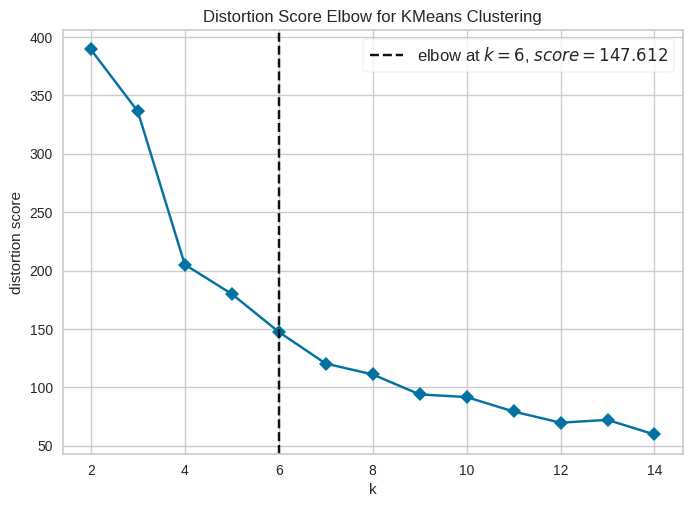

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [17]:

base_model=KMeans()
Visualizer=kelbow_visualizer(base_model,X_pre,k=(2,15),timings=False)
Visualizer.show()

In [18]:
best_kmeans=KMeans(n_clusters=6)
clusters=best_kmeans.fit_predict(X_pre)
clusters

array([0, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0,
       5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 1, 0, 5, 0,
       5, 0, 1, 4, 4, 4, 1, 4, 4, 1, 1, 1, 1, 1, 4, 1, 1, 4, 1, 1, 1, 4,
       1, 1, 4, 4, 1, 1, 1, 1, 1, 4, 1, 4, 4, 1, 1, 4, 1, 1, 4, 1, 1, 4,
       4, 1, 1, 4, 1, 4, 4, 4, 1, 4, 1, 4, 4, 1, 1, 4, 1, 4, 1, 1, 1, 1,
       1, 4, 4, 4, 4, 4, 1, 1, 1, 1, 4, 4, 4, 3, 4, 3, 2, 3, 2, 3, 2, 3,
       4, 3, 4, 3, 2, 3, 4, 3, 2, 3, 4, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 1, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3], dtype=int32)

In [19]:
# Centroids of each cluster
best_kmeans.cluster_centers_

array([[-0.97602698, -1.32549704,  1.0371827 ],
       [ 1.25472096, -0.24021294, -0.04399777],
       [ 0.27091925,  1.10223769, -1.2755309 ],
       [-0.44191719,  0.99158305,  1.23950275],
       [-0.88539853, -0.09869244, -0.13617409],
       [ 0.47895722, -1.30822992, -1.19644353]])

In [20]:
X.head()

,Age,Income,Spending
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [21]:
X["Clusters"]=clusters
X.head()

,Age,Income,Spending,Clusters
0,19,15,39,0
1,21,15,81,0
2,20,16,6,5
3,23,16,77,0
4,31,17,40,5


In [22]:
for i in range(6):
  print(f"Details of cluster {i}")
  display(X[X["Clusters"]==i])
  print("-----------------------------------")

Details of cluster 0


,Age,Income,Spending,Clusters
0,19,15,39,0
1,21,15,81,0
3,23,16,77,0
5,22,17,76,0
7,23,18,94,0
9,30,19,72,0
11,35,19,99,0
13,24,20,77,0
15,22,20,79,0
17,20,21,66,0


-----------------------------------
Details of cluster 1


,Age,Income,Spending,Clusters
40,65,38,35,1
46,50,40,55,1
50,49,42,52,1
53,59,43,60,1
54,50,43,45,1
55,47,43,41,1
56,51,44,50,1
57,69,44,46,1
59,53,46,46,1
60,70,46,56,1


-----------------------------------
Details of cluster 2


,Age,Income,Spending,Clusters
126,43,71,35,2
128,59,71,11,2
130,47,71,9,2
136,44,73,7,2
140,57,75,5,2
144,25,77,12,2
146,48,77,36,2
148,34,78,22,2
150,43,78,17,2
152,44,78,20,2


-----------------------------------
Details of cluster 3


,Age,Income,Spending,Clusters
123,39,69,91,3
125,31,70,77,3
127,40,71,95,3
129,38,71,75,3
131,39,71,75,3
133,31,72,71,3
135,29,73,88,3
137,32,73,73,3
139,35,74,72,3
141,32,75,93,3


-----------------------------------
Details of cluster 4


,Age,Income,Spending,Clusters
47,27,40,47,4
48,29,40,42,4
49,31,40,42,4
51,33,42,60,4
52,31,43,54,4
58,27,46,51,4
61,19,46,55,4
65,18,48,59,4
68,19,48,59,4
69,32,48,47,4


-----------------------------------
Details of cluster 5


,Age,Income,Spending,Clusters
2,20,16,6,5
4,31,17,40,5
6,35,18,6,5
8,64,19,3,5
10,67,19,14,5
12,58,20,15,5
14,37,20,13,5
16,35,21,35,5
18,52,23,29,5
20,35,24,35,5


-----------------------------------


## Metrics

In [23]:
best_kmeans.inertia_

133.9578383845476

## Plot the clusters for this model

In [24]:
import plotly.express as px

In [25]:
fig=px.scatter_3d(data_frame=X,x="Age",y="Income",z="Spending",color="Clusters",symbol="Clusters")
fig.show()